In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Grab 2020 and 2021 data from MyDrive
df_2020 = pd.read_csv('drive/MyDrive/Chase 2020.CSV')
df_2021 = pd.read_csv('drive/MyDrive/Chase 2021.CSV')

#**Combining Files**
With our data imported into two separate dataframes, we need to combine them into one to analyze

In [157]:
df = df_2020.append(df_2021)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216 entries, 0 to 601
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  1216 non-null   object 
 1   Post Date         1216 non-null   object 
 2   Description       1216 non-null   object 
 3   Category          1193 non-null   object 
 4   Type              1216 non-null   object 
 5   Amount            1216 non-null   float64
 6   Memo              0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 76.0+ KB


#**Data Cleaning**
Here we can see the dates are seen as objects, convert them to dates

In [158]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Post Date'] = pd.to_datetime(df['Post Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216 entries, 0 to 601
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  1216 non-null   datetime64[ns]
 1   Post Date         1216 non-null   datetime64[ns]
 2   Description       1216 non-null   object        
 3   Category          1193 non-null   object        
 4   Type              1216 non-null   object        
 5   Amount            1216 non-null   float64       
 6   Memo              0 non-null      float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 76.0+ KB


Memo column is completely null, so let's drop it.
We will also focus on Post Date for analysis so we will drop Transaction Date as well.

In [159]:
df.drop(['Memo'], axis=1, inplace=True)
df.drop(['Transaction Date'], axis=1, inplace=True)

In [160]:
df.sort_values(['Post Date'], inplace=True)

Let's explore the data for errors and correct them. The reason I initially started this exploration was to change 'BJs Wholesale Club' category to groceries.

In [161]:
df.loc[df['Description'].str.contains('BJS WHOLESALE')] #using str.contains() because the description changes from store to store.

,Post Date,Description,Category,Type,Amount
266,2020-07-26,BJS WHOLESALE #0184,Shopping,Sale,-220.38
180,2020-09-09,BJS WHOLESALE #0078,Groceries,Sale,-351.01
148,2020-09-28,BJS WHOLESALE #0078,Groceries,Sale,-277.01
127,2020-10-12,BJS WHOLESALE #0078,Shopping,Sale,-180.27
106,2020-10-28,BJS WHOLESALE #0078,Shopping,Sale,-288.08
88,2020-11-11,BJS WHOLESALE #0078,Shopping,Sale,-190.83
66,2020-11-23,BJS WHOLESALE #0078,Shopping,Sale,-136.73
49,2020-12-09,BJS WHOLESALE CLUB,Shopping,Sale,-87.91
17,2020-12-21,BJS WHOLESALE #0184,Shopping,Sale,-200.88
1,2020-12-30,BJS WHOLESALE CLUB,Shopping,Sale,-113.10


In [162]:
df.loc[df['Description'].str.contains('BJS WHOLESALE'), 'Category'] = 'Groceries' #Update category to groceries

df.loc[df['Description'].str.contains('BJS WHOLESALE')] #Check the dataframe

,Post Date,Description,Category,Type,Amount
266,2020-07-26,BJS WHOLESALE #0184,Groceries,Sale,-220.38
180,2020-09-09,BJS WHOLESALE #0078,Groceries,Sale,-351.01
148,2020-09-28,BJS WHOLESALE #0078,Groceries,Sale,-277.01
127,2020-10-12,BJS WHOLESALE #0078,Groceries,Sale,-180.27
106,2020-10-28,BJS WHOLESALE #0078,Groceries,Sale,-288.08
88,2020-11-11,BJS WHOLESALE #0078,Groceries,Sale,-190.83
66,2020-11-23,BJS WHOLESALE #0078,Groceries,Sale,-136.73
49,2020-12-09,BJS WHOLESALE CLUB,Groceries,Sale,-87.91
17,2020-12-21,BJS WHOLESALE #0184,Groceries,Sale,-200.88
1,2020-12-30,BJS WHOLESALE CLUB,Groceries,Sale,-113.10


Let's check if the same fix needs to be added to Costco and do the same

In [163]:
df.loc[df['Description'].str.contains('COSTCO WH')].head() #using head() to shorten output

,Post Date,Description,Category,Type,Amount
581,2021-01-13,COSTCO WHSE #1196,Shopping,Sale,-55.00
579,2021-01-13,COSTCO WHSE #1196,Shopping,Sale,-212.18
459,2021-03-21,COSTCO WHSE #1196,Shopping,Sale,-364.03
417,2021-04-07,COSTCO WHSE #1196,Shopping,Sale,-252.29
377,2021-04-26,COSTCO WHSE #1196,Shopping,Sale,-179.71


In [164]:
df.loc[df['Description'].str.contains('COSTCO WH'), 'Category'] = 'Groceries'

Fixing some more incorrect categorizations

In [165]:
df.loc[df['Description'].str.contains('GOOGLE')]

,Post Date,Description,Category,Type,Amount
599,2020-01-09,GOOGLE *YouTube TV,Shopping,Sale,-49.99
595,2020-01-10,GOOGLE *YouTube TV,Bills & Utilities,Return,49.99
594,2020-01-10,GOOGLE *YouTube TV,Bills & Utilities,Sale,-53.16
538,2020-02-10,GOOGLE *YouTube TV,Bills & Utilities,Sale,-53.16
495,2020-03-10,GOOGLE *YouTube TV,Entertainment,Sale,-53.16
470,2020-04-10,GOOGLE *YouTube TV,Bills & Utilities,Sale,-53.16
439,2020-05-10,GOOGLE*YOUTUBE TV,Bills & Utilities,Sale,-53.16
367,2020-06-10,GOOGLE*YOUTUBE TV,Bills & Utilities,Sale,-53.16
306,2020-07-10,GOOGLE *YouTube TV,Shopping,Sale,-53.16
239,2020-08-10,GOOGLE*YOUTUBE TV,Bills & Utilities,Sale,-69.12


In [166]:
df.loc[df['Description'].str.contains('GOOGLE'), 'Category'] = 'Bills & Utilities'

In [167]:
df.loc[df['Description'].str.contains('PELOTON'), 'Category'] = 'Health & Wellness'

In [168]:
df.loc[df['Description'].str.contains('Tips'), 'Category'] = 'Groceries'

In [169]:
df['Category'].unique()

array(['Fees & Adjustments', 'Groceries', 'Food & Drink',
       'Bills & Utilities', 'Entertainment', 'Travel', 'Gas', 'Home',
       'Health & Wellness', nan, 'Personal', 'Shopping',
       'Professional Services', 'Education', 'Automotive'], dtype=object)

In [170]:
df.loc[pd.isna(df['Category'])].head()

,Post Date,Description,Category,Type,Amount
565,2020-01-24,AUTOMATIC PAYMENT - THANK,NaN,Payment,1195.38
515,2020-02-24,AUTOMATIC PAYMENT - THANK,NaN,Payment,3881.44
482,2020-03-24,AUTOMATIC PAYMENT - THANK,NaN,Payment,1768.51
458,2020-04-24,AUTOMATIC PAYMENT - THANK,NaN,Payment,1041.01
417,2020-05-24,AUTOMATIC PAYMENT - THANK,NaN,Payment,1228.54


In [171]:
df.loc[pd.isna(df['Category']), 'Category'] = 'Payment'

df.loc[pd.isna(df['Category'])].head() #Should be blank as these are not na anymore

,Post Date,Description,Category,Type,Amount


#**Data Exploration and Visualization**
Beginning with adding columns separating dates for easier analysis

In [172]:
df['Year'] = [d.year for d in df['Post Date']]
df['Month'] = [d.strftime('%B') for d in df['Post Date']]

df

,Post Date,Description,Category,Type,Amount,Year,Month
612,2020-01-01,ANNUAL MEMBERSHIP FEE,Fees & Adjustments,Fee,-450.00,2020,January
613,2020-01-01,BIG Y 44 ROCKY HILL,Groceries,Sale,-11.00,2020,January
611,2020-01-01,ANNUAL MEMBERSHIP FEE,Fees & Adjustments,Fee,-75.00,2020,January
610,2020-01-02,Tavern on 3,Food & Drink,Sale,-75.34,2020,January
609,2020-01-03,UTILITY MANAGEMENT SOLUTI,Bills & Utilities,Sale,-32.10,2020,January
...,...,...,...,...,...,...,...
4,2021-09-29,COX HARTFORD COMM SER,Bills & Utilities,Sale,-58.99,2021,September
3,2021-09-29,Amazon.com*2C2HB1LH2,Groceries,Sale,-39.44,2021,September
2,2021-09-30,KALIUBON RAMEN,Food & Drink,Sale,-38.65,2021,September
1,2021-09-30,Spotify USA,Bills & Utilities,Sale,-13.81,2021,September


In [173]:
monthly_total = df.groupby(['Year', 'Month','Category'],as_index=False).sum()

monthly_total

,Year,Month,Category,Amount
0,2020,April,Bills & Utilities,-175.41
1,2020,April,Food & Drink,-184.89
2,2020,April,Gas,-47.05
3,2020,April,Groceries,-529.39
4,2020,April,Health & Wellness,-5.00
...,...,...,...,...
217,2021,September,Health & Wellness,-1123.29
218,2021,September,Home,-329.98
219,2021,September,Payment,2345.09
220,2021,September,Shopping,-212.89


In [174]:
monthly_groceries = monthly_total[monthly_total['Category'] == 'Groceries']

monthly_groceries


,Year,Month,Category,Amount
3,2020,April,Groceries,-529.39
14,2020,August,Groceries,-393.48
26,2020,December,Groceries,-773.04
38,2020,February,Groceries,-41.73
49,2020,January,Groceries,-475.62
60,2020,July,Groceries,-530.02
74,2020,June,Groceries,-505.89
90,2020,May,Groceries,-434.87
101,2020,November,Groceries,-469.08
111,2020,October,Groceries,-739.20


In [175]:
monthly_groceries['Amount'].mean()

-599.3945000000001

In [176]:
yearly_total = df.groupby(['Year', 'Category'], as_index=False).sum()

yearly_total

,Year,Category,Amount
0,2020,Automotive,-830.23
1,2020,Bills & Utilities,-3351.10
2,2020,Education,-810.00
3,2020,Entertainment,-439.56
4,2020,Fees & Adjustments,8.71
5,2020,Food & Drink,-5391.94
6,2020,Gas,-1525.82
7,2020,Groceries,-5751.81
8,2020,Health & Wellness,-4521.35
9,2020,Home,-4051.09


In [177]:
yearly_pivot = yearly_total.pivot(index='Category', columns='Year', values='Amount')

yearly_pivot

Year,2020,2021
Category,,
Automotive,-830.23,-758.07
Bills & Utilities,-3351.10,-3300.12
Education,-810.00,-474.90
Entertainment,-439.56,-1546.32
Fees & Adjustments,8.71,1296.80
Food & Drink,-5391.94,-4990.51
Gas,-1525.82,-1417.66
Groceries,-5751.81,-6236.08
Health & Wellness,-4521.35,-3528.02


Making a grand total column

In [178]:
grand_total = df.groupby('Category', as_index=False).sum()

yearly_pivot['Grand Total'] = grand_total['Amount'].tolist()

yearly_pivot

Year,2020,2021,Grand Total
Category,,,
Automotive,-830.23,-758.07,-1588.30
Bills & Utilities,-3351.10,-3300.12,-6651.22
Education,-810.00,-474.90,-1284.90
Entertainment,-439.56,-1546.32,-1985.88
Fees & Adjustments,8.71,1296.80,1305.51
Food & Drink,-5391.94,-4990.51,-10382.45
Gas,-1525.82,-1417.66,-2943.48
Groceries,-5751.81,-6236.08,-11987.89
Health & Wellness,-4521.35,-3528.02,-8049.37


In [179]:
yearly_pivot.drop('Payment', inplace=True)
yearly_pivot['Grand Total'] = yearly_pivot['Grand Total'].abs()

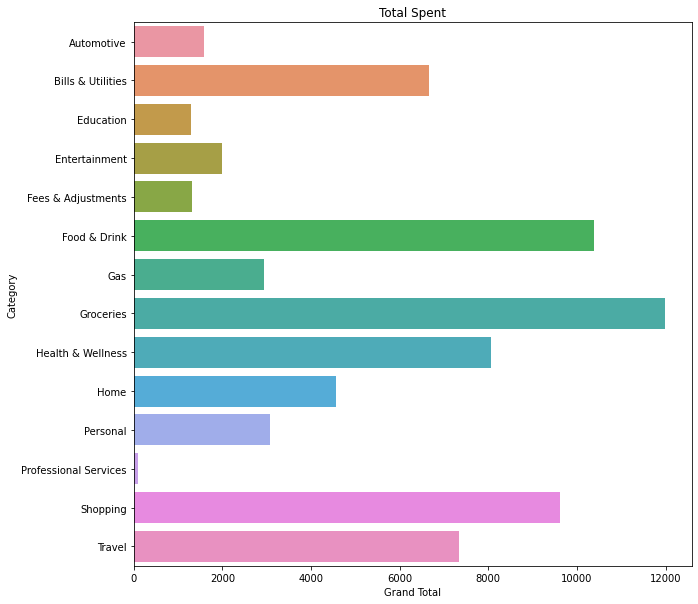

In [180]:
plt.figure(figsize=(10,10))
sns.barplot(x=yearly_pivot['Grand Total'], y=yearly_pivot.index, orient='h');
plt.title('Total Spent');

Finding the most expensive period per category

In [181]:
monthly_total.drop(monthly_total[monthly_total['Category']=='Payment'].index, inplace=True)

In [190]:
monthly_total[~monthly_total.sort_values(['Amount']).duplicated(subset=['Category'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Year,Month,Category,Amount
9,2020,August,Education,-550.00
44,2020,January,Bills & Utilities,-1053.50
59,2020,July,Gas,-207.65
92,2020,May,Home,-1663.23
94,2020,May,Professional Services,-35.00
115,2020,October,Personal,-1090.00
122,2020,September,Health & Wellness,-3835.58
136,2021,April,Shopping,-1482.17
161,2021,January,Fees & Adjustments,-277.09
169,2021,July,Automotive,-667.42


Average monthly spend per category

In [197]:
average_monthly = monthly_total.groupby(['Category']).mean().drop(['Year'], axis=1)

average_monthly['Amount'] = round(average_monthly['Amount'],2)

average_monthly

,Amount
Category,
Automotive,-226.90
Bills & Utilities,-316.72
Education,-183.56
Entertainment,-198.59
Fees & Adjustments,145.06
Food & Drink,-494.40
Gas,-140.17
Groceries,-599.39
Health & Wellness,-402.47


#**Export to CSV**

In [125]:
yearly_pivot.to_csv('drive/MyDrive/chase-data-testing.csv')